In [17]:
from rsi_backtest import make_extensive_test_ticker, backtest_rsi, make_extensive_test_tickers_list
import pandas as pd
import warnings

from stocks_data import find_stocks_with_high_volume
from tickers import *
from rsi_opportunity_analyzer import *
from stocks_data import get_data_with_adj_close
from rsi_plot import plot_rsi_data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignora FutureWarnings específicos relacionados a yfinance
warnings.filterwarnings("ignore", category=FutureWarning)

Relatório com Oportunidades de Ticker sobre comprados e sobrevendidos e também ativos com volume acima da média em 1 desvio padrão

In [19]:
interval = "1wk"
ifix_analysis = analyze_rsi_opportunities_from_tickers(IFIX, interval, "2y")
idiv_analysis = analyze_rsi_opportunities_from_tickers(IDIV, interval, "5y", lower_rsi_limit=0.15)
print("____________IFIX_______________")
print_rsi_opportunity_analysis(ifix_analysis)
print(f"IFIX com alto volume {find_stocks_with_high_volume(IFIX, '1d', '1mo', 10)}")
print("____________IDIV_______________")
print_rsi_opportunity_analysis(idiv_analysis)
print(f"IDIV com alto volume {find_stocks_with_high_volume(IDIV, '1d', '1mo', 10)}")

Aqui
____________IDIV_______________
overbought tickers: ['BBAS3', 'CXSE3', 'CSMG3', 'CMIN3', 'ITSA4', 'JBSS3', 'PETR4', 'SANB11', 'CSNA3', 'VIVT3', 'USIM5']
oversold tickers: []
IDIV com alto volume ['ABCB4', 'LAVV3', 'LEVE3']


Estudo de entradas e saídas em relação a um ativo em específico para diferentes alvos

In [15]:
ticker = "ITSA4"
period = "15y"
interval = "1wk"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 4

print(f"____________backtest {ticker}_______________")
backtest = backtest_rsi(ticker, 1.2, period, interval, min_holding_period=min_holding_period, use_stop=use_stop,
                        use_upper_threshold=use_upper_threshold, use_target=use_target)
print(backtest)

print(f"____________ticker_analysis_results {ticker}_______________")
ticker_analysis_results = make_extensive_test_ticker(ticker, period, interval,
                                                        min_holding_period=min_holding_period,
                                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                                        use_target=use_target)
print(ticker_analysis_results)

____________backtest ITSA4_______________
    Entry RSI Signal Date Entry Date     Entry      Stop    Target  Exit Date Duration  Gain/Loss %  Result  R multiple
0   42.532575  2010-05-20 2010-05-27  2.449429  2.240087  2.700640 2010-07-08  42 days    10.255885  Target    1.200000
1   45.146703  2011-02-10 2011-02-17  2.776024  2.478975  3.132483 2011-07-07 140 days   -10.700528    Stop   -1.000000
2   42.660803  2011-03-03 2011-03-17  2.736889  2.601860  2.898924 2011-05-12  56 days    -4.933663    Stop   -1.000000
3   47.341648  2011-03-17 2011-03-24  2.750985  2.520034  3.028126 2011-05-19  56 days    -8.395197    Stop   -1.000000
4   44.415910  2011-05-26 2011-06-02  2.693962  2.494577  2.933224 2011-07-07  35 days    -7.401187    Stop   -1.000000
5   40.448422  2011-08-25 2011-09-01  2.215366  1.915391  2.575336 2011-12-01  91 days    16.248791  Target    1.200000
6   49.888510  2011-10-06 2011-10-13  2.322196  2.030984  2.671649 2011-12-29  77 days    15.048403  Target    1.20000

Estudo extensivo de todo um mercado para encontrar os melhores indicadores para cada alvo

In [ ]:
period = "15y"
interval = "1wk"
use_stop = True
use_upper_threshold = True
use_target = True
min_holding_period = 4

print(make_extensive_test_tickers_list(IDIV, period, interval, min_holding_period=min_holding_period,
                                        use_stop=use_stop, use_upper_threshold=use_upper_threshold,
                                        use_target=use_target))

Encontra os limites superior e inferior de RSI para um determinado ativo

limite inferior de RSI para o ticker CMIG3: 39.73016014966327
limite superior de RSI para o ticker CMIG3: 71.00274380194392
valor atual de RSI para o ticker CMIG3: 41.99497372602904


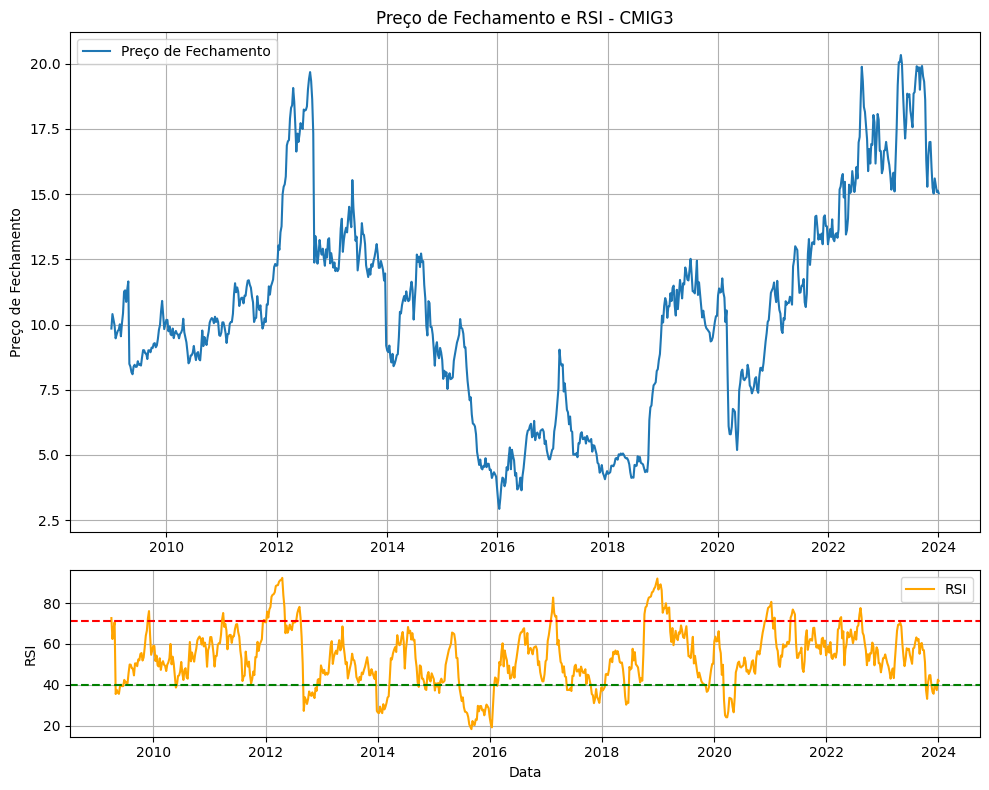

In [18]:
ticker = "CMIG3"
period = "15y"
interval = "1wk"

low_threshold = 0.15
high_threshold = 0.9

data = get_data_with_adj_close(ticker, interval, period)
rsi = calculate_rsi(data, period=14)
lower_threshold = get_lower_threshold_rsi(rsi, low_threshold)
upper_threshold = get_upper_threshold_rsi(rsi, high_threshold)

print(f"limite inferior de RSI para o ticker {ticker}: {lower_threshold}")
print(f"limite superior de RSI para o ticker {ticker}: {upper_threshold}")
print(f"valor atual de RSI para o ticker {ticker}: {rsi.iloc[-1]}")
plot_rsi_data(data, rsi, ticker, upper_threshold, lower_threshold)
# print(data['RSI'])